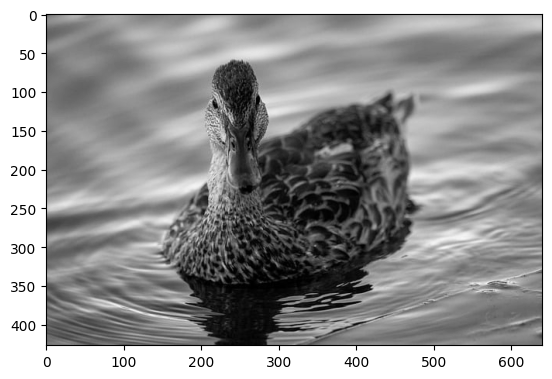

In [3]:
from utils import read_im, save_im, normalize
import matplotlib.pyplot as plt
import numpy as np

im = read_im("images/duck.jpeg")

def greyscale(im):
    """ Converts an RGB image to greyscale

    Args:
        im ([type]): [np.array of shape [H, W, C]]

    Returns:
        im ([type]): [np.array of shape [H, W]]
    """
    # YOUR CODE HERE
    new_im = np.zeros((im.shape[0], im.shape[1]))
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            new_im[i,j] = 0.212 * im[i,j,0] + 0.7152 * im[i,j,1] + 0.0722 * im[i,j,2]
            # im = np.dot(im, [0.212, 0.7152, 0.0722])
    return new_im

im_greyscale = greyscale(im)

plt.imshow(im_greyscale, cmap='gray')
save_im("results/duck_greyscale.jpeg", im_greyscale, cmap='gray')

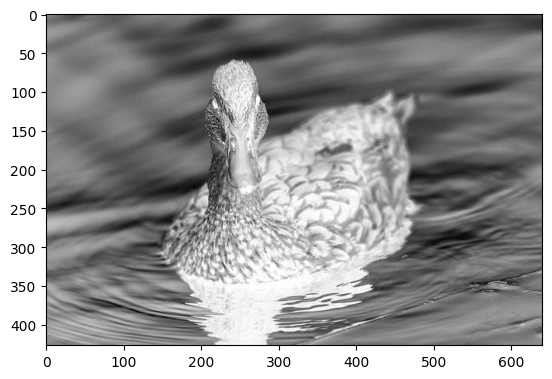

In [4]:
im = read_im("results/duck_greyscale.jpeg")

def inverse(im):
    """ Finds the inverse of the grayscale image

    Args:
        im ([type]): [np.array of shape [H, W]]

    Returns:
        im ([type]): [np.array of shape [H, W]]
    """
    im = 1- im
    return im

im_inverse = inverse(im)

plt.imshow(im_inverse, cmap='gray')
save_im("results/duck_inverse.jpeg", im_inverse, cmap='gray')

In [5]:
def convolve_im(im, kernel):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    # YOUR CODE HERE
    new_image_R = np.zeros((im.shape[0], im.shape[1]))
    new_image_G = np.zeros((im.shape[0], im.shape[1]))
    new_image_B = np.zeros((im.shape[0], im.shape[1]))

    kernel = np.flipud(np.fliplr(kernel))
    
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    im = np.pad(im, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)))

    if kernel.shape[0] > im.shape[0] or kernel.shape[1] > im.shape[1]:
        raise ValueError('Kernel should be smaller than the image')

    for i in range(0, new_image_G.shape[0]):
        for j in range(0, new_image_G.shape[1]):

            end_i = i + kernel.shape[0]
            end_j = j + kernel.shape[1]

            if end_i > im.shape[0]: end_i = new_image_G.shape[0]
            if end_j > im.shape[1]: end_j = new_image_G.shape[1]

            new_image_R[i, j] = np.sum(im[i:end_i, j:end_j, 0] * kernel)
            new_image_G[i, j] = np.sum(im[i:end_i, j:end_j, 1] * kernel)
            new_image_B[i, j] = np.sum(im[i:end_i, j:end_j, 2] * kernel)
    new_image = np.stack((new_image_R, new_image_G, new_image_B), axis=-1)
    return new_image    

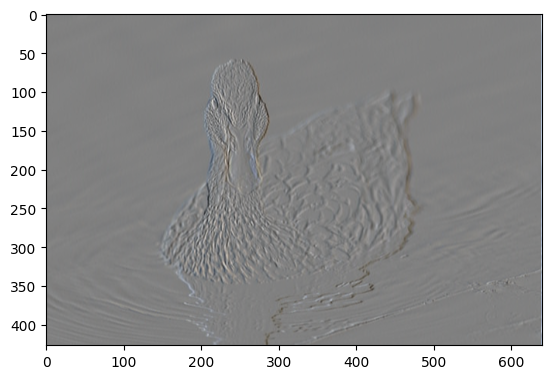

In [6]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

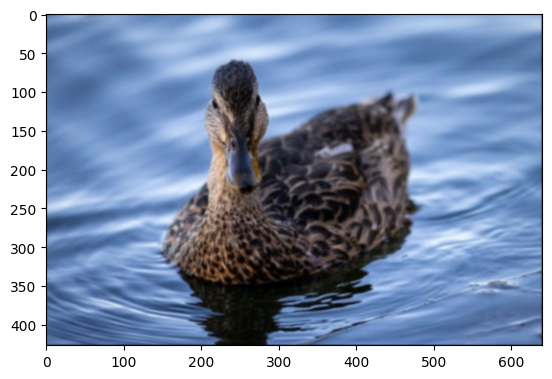

In [7]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)

In [8]:
print(np.flipud(np.fliplr(h_b))-np.rot90(h_b, 2))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
